# Income Estimates

Cleaned by: Abena Bonsu

This file contains information about income estimates calculated for different regions within San Diego County. In particular, it makes estimates for the San Diego-Carlsbad-San Marcos Metropolitan areas. This data also includes median family income values, which can be compared with the aforementioned estimates as well.

This data will be cleaned and used to cross reference both crime and housing prices within certain areas/zip codes in California. This data will provide us with information about the types of houses (and by extension, areas) available to groups. We believe that the ability to buy houses/live in a particular area will be dependent on--or at least heavily correlated with-- these income estimates.

In [110]:
# imports
import numpy as np
import pandas as pd
import scipy as sp
import scipy.io as io
import scipy.signal as sig
import math as math
import random 
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [111]:
import warnings
warnings.filterwarnings("ignore")

# 1. Clean Data

Parse through data and leave only the relevant pieces of information. This data includes income estimates that have been separated into three overarching categories: the low income estimate bracket (80%), very low income estimate bracket (50%) and lowest income estimate bracket (30%). Along with this data, the median family income is also included.

These three sub categories are broken down further. Within each bracket, income estimates are separated out by how many persons are within the group. The scale ranges from 1 - 8 persons. 

This data will be cleaned to calculate the averages within the sub groups. We do not necessarily care about the change within groups, but rather are interested in seeing the differences between groups.

In [112]:
# grabbing data from computer
filepath = '/Users/Agykbon/Desktop/Abena/Median-Income-Estimates.csv'
df = pd.read_csv(filepath)

# printing different categories
print(df.keys())

Index(['State', 'County', 'Metropolitan area', 'Category', '2007', '2008',
       '2009', '2010', '2011', '2012'],
      dtype='object')


In [113]:
# dropping null/irrelevant data
df = df.dropna()
df = df[['Category', '2007', '2008', '2009', '2010', '2011', '2012']]

## Create Dataframes for Each Income Category

Separate out the data into the distinct categories mentioned above and create data frames to hold each set. These sets will be used to compute the averages of each income bracket.

In [114]:
# low income category
lowIncome = df.drop(df.index[0:8]) 
lowIncome = lowIncome.drop(lowIncome.index[8:17])

# very low income category
veryLowIncome = df.tail(n=8) 

# lowest income category
lowestIncome = df.head(8)

# median family income
medianIncome = df.drop(df.index[0:16])
medianIncome = medianIncome.drop(medianIncome.index[1:9])

In [115]:
print(lowIncome)

                              Category    2007    2008    2009    2010  \
8    Low (80%) Income Limit - 1 Person  39,300  44,250  46,250  44,000   
9   Low (80%) Income Limit - 2 Persons  44,900  50,550  52,900  50,250   
10  Low (80%) Income Limit - 3 Persons  50,550  56,900  59,500  56,550   
11  Low (80%) Income Limit - 4 Persons  56,150  63,200  66,100  62,800   
12  Low (80%) Income Limit - 5 Persons  60,650  68,250  71,400  67,850   
13  Low (80%) Income Limit - 6 Persons  65,150  73,300  76,700  72,850   
14  Low (80%) Income Limit - 7 Persons  69,650  78,350  81,950  77,900   
15  Low (80%) Income Limit - 8 Persons  74,100  83,400  87,250  82,900   

      2011    2012  
8   45,850  45,000  
9   52,400  51,400  
10  58,950  57,850  
11  65,500  64,250  
12  70,750  69,400  
13  76,000  74,550  
14  81,250  79,700  
15  86,500  84,850  


In [116]:
print(veryLowIncome)

                                   Category    2007    2008    2009    2010  \
17   Very Low (50%) Income Limit - 1 Person  24,550  27,650  28,900  27,500   
18  Very Low (50%) Income Limit - 2 Persons  28,100  31,600  33,050  31,400   
19  Very Low (50%) Income Limit - 3 Persons  31,600  35,550  37,150  35,350   
20  Very Low (50%) Income Limit - 4 Persons  35,100  39,500  41,300  39,250   
21  Very Low (50%) Income Limit - 5 Persons  37,900  42,650  44,600  42,400   
22  Very Low (50%) Income Limit - 6 Persons  40,700  45,800  47,900  45,550   
23  Very Low (50%) Income Limit - 7 Persons  43,500  49,000  51,200  48,700   
24  Very Low (50%) Income Limit - 8 Persons  46,350  52,150  54,500  51,850   

      2011    2012  
17  28,700  28,150  
18  32,800  32,150  
19  36,900  36,150  
20  40,950  40,150  
21  44,250  43,400  
22  47,550  46,600  
23  50,800  49,800  
24  54,100  53,000  


In [117]:
print(lowestIncome)

                       Category    2007    2008    2009    2010    2011  \
0   30% Income Limit - 1 person  14,750  16,600  17,350  16,500  17,200   
1  30% Income Limit - 2 Persons  16,850  18,950  19,850  18,850  19,650   
2  30% Income Limit - 3 Persons  18,950  21,350  22,300  21,200  22,100   
3  30% Income Limit - 4 Persons  21,050  23,700  24,800  23,550  24,550   
4  30% Income Limit - 5 Persons  22,750  25,600  26,800  25,450  26,550   
5  30% Income Limit - 6 Persons  24,400  27,500  28,750  27,350  28,500   
6  30% Income Limit - 7 Persons  26,100  29,400  30,750  29,250  30,450   
7  30% Income Limit - 8 Persons  27,800  31,300  32,750  31,100  32,450   

     2012  
0  16,900  
1  19,300  
2  21,700  
3  24,100  
4  26,050  
5  28,000  
6  29,900  
7  31,850  


In [118]:
print(medianIncome)

                Category    2007    2008    2009    2010    2011    2012
16  Median Family Income  69,400  72,100  74,900  75,500  74,900  75,900


In [119]:
# Print raw data without categories
print(lowIncome.drop('Category', 1))
print()
print(veryLowIncome.drop('Category', 1))
print()
print(lowestIncome.drop('Category', 1))

      2007    2008    2009    2010    2011    2012
8   39,300  44,250  46,250  44,000  45,850  45,000
9   44,900  50,550  52,900  50,250  52,400  51,400
10  50,550  56,900  59,500  56,550  58,950  57,850
11  56,150  63,200  66,100  62,800  65,500  64,250
12  60,650  68,250  71,400  67,850  70,750  69,400
13  65,150  73,300  76,700  72,850  76,000  74,550
14  69,650  78,350  81,950  77,900  81,250  79,700
15  74,100  83,400  87,250  82,900  86,500  84,850

      2007    2008    2009    2010    2011    2012
17  24,550  27,650  28,900  27,500  28,700  28,150
18  28,100  31,600  33,050  31,400  32,800  32,150
19  31,600  35,550  37,150  35,350  36,900  36,150
20  35,100  39,500  41,300  39,250  40,950  40,150
21  37,900  42,650  44,600  42,400  44,250  43,400
22  40,700  45,800  47,900  45,550  47,550  46,600
23  43,500  49,000  51,200  48,700  50,800  49,800
24  46,350  52,150  54,500  51,850  54,100  53,000

     2007    2008    2009    2010    2011    2012
0  14,750  16,600  17,350  16,

# 2. Pre Visualizations

Before further extraction takes place, this section will analyze the data found within each category, and compare them to one another. This pre-visualization will help us to make sense of the raw data as it stands. It will later be manipulated to include only the averages of income estimates within the distinct groups. 

In [120]:
# Method used to convert data found within a dataframe from object to float
def convertData(dataframe):
        deep_dataframe = dataframe.copy(deep=True)
        for i in range(len(deep_dataframe)):
            deep_dataframe.iloc[i] = [x.replace(',', '') for x in deep_dataframe.iloc[i]]
            deep_dataframe.iloc[i] = deep_dataframe.iloc[i].astype(float)
            plt.plot(deep_dataframe.iloc[i])
        return deep_dataframe   

(10000, 90000)

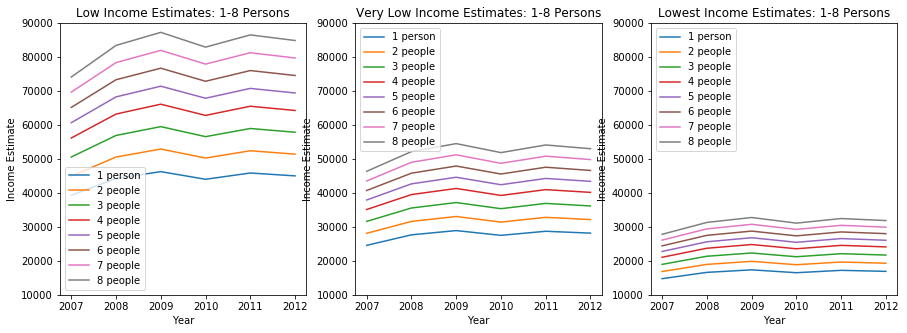

In [121]:
# Graph the "Low Income Estimates" bracket within group 
plt.figure(1,figsize=(15,5))
plt.subplot(1,3,1)
lowIncomeGraph = convertData(lowIncome.drop('Category', 1))
plt.title('Low Income Estimates: 1-8 Persons')
plt.xlabel('Year')
plt.ylabel('Income Estimate')
plt.legend(['1 person', '2 people', '3 people', '4 people', '5 people',
               '6 people', '7 people', '8 people'], loc='lower left')
plt.ylim([10000,90000])

# Graph the "Very Low Income Estimates" bracket within group 
plt.subplot(1,3,2)
VlowIncomeGraph = convertData(veryLowIncome.drop('Category', 1))
plt.title('Very Low Income Estimates: 1-8 Persons')
plt.xlabel('Year')
plt.ylabel('Income Estimate')
plt.legend(['1 person', '2 people', '3 people', '4 people', '5 people',
               '6 people', '7 people', '8 people'], loc='upper left')
plt.ylim([10000,90000])

# Graph the "Lowest Income Estimates" bracket within group 
plt.subplot(1,3,3)
lowestIncomeGraph = convertData(lowestIncome.drop('Category', 1))
plt.title('Lowest Income Estimates: 1-8 Persons')
plt.xlabel('Year')
plt.ylabel('Income Estimate')
plt.legend(['1 person', '2 people', '3 people', '4 people', '5 people',
               '6 people', '7 people', '8 people'], loc='upper left')
plt.ylim([10000,90000])

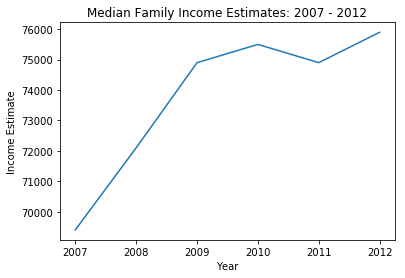

In [122]:
# Graph median income estimates
medianIncomeGraph = convertData(medianIncome.drop('Category', 1))
plt.title('Median Family Income Estimates: 2007 - 2012')
plt.xlabel('Year')
plt.ylabel('Income Estimate')

# 3. Further Extraction: Averages Within Years

In this section, I created a method that helps to return the averages of income estimates found within the groups of a certain year. My team doesn't necessarily need to keep the income estimate data separated out by # of people (1-8 persons). This section focuses on combining the relevant data so that we can produce an average for each subgroup within the overarching category.

In [123]:
# Method used to return the average of a particular group within a year
def getAverage(dataframe2, string):
        dataframe = dataframe2
        dataframe[string] = [x.replace(',', '') for x in dataframe2[string]]
        dataframe[string] = dataframe[string].astype(float)
        income = dataframe[string].tolist()
        
        inc = 0.0
        for i in range(len(income)):
            inc+=income[i]
        inc = inc/8
        return inc    

In [124]:
# Get the averages for "Low Income Estimate" bracket 
LowI07 = getAverage(lowIncome, '2007')
LowI08 = getAverage(lowIncome, '2008')
LowI09 = getAverage(lowIncome, '2009')
LowI10 = getAverage(lowIncome, '2010')
LowI11 = getAverage(lowIncome, '2011')
LowI12 = getAverage(lowIncome, '2012')

# Create new dataframe to hold this data
df_low = pd.DataFrame(columns=['2007',
    '2008','2009','2010', '2011', '2012'],
    index=['Low Income'])
df_low.loc['Low Income'] = pd.Series(
    {'2007':LowI07, '2008':LowI07, 
     '2008':LowI08, '2009':LowI09, 
     '2010':LowI10, '2011':LowI11, 
     '2012':LowI12})

In [125]:
df_low

,2007,2008,2009,2010,2011,2012
Low Income,57556.2,64775,67756.2,64387.5,67150,65875


In [126]:
# Get the averages for "Very Low Income Estimate" bracket 
VLowI07 = getAverage(veryLowIncome, '2007')
VLowI08 = getAverage(veryLowIncome, '2008')
VLowI09 = getAverage(veryLowIncome, '2009')
VLowI10 = getAverage(veryLowIncome, '2010')
VLowI11 = getAverage(veryLowIncome, '2011')
VLowI12 = getAverage(veryLowIncome, '2012')

# Create new dataframe to hold this data
df_vlow = pd.DataFrame(columns=['2007',
    '2008','2009','2010', '2011', '2012'],
    index=['Very Low Income'])

df_vlow.loc['Very Low Income'] = pd.Series(
    {'2007':VLowI07, '2008':VLowI07, 
     '2008':VLowI08, '2009':VLowI09, 
     '2010':VLowI10, '2011':VLowI11, 
     '2012':VLowI12})

In [127]:
df_vlow

,2007,2008,2009,2010,2011,2012
Very Low Income,35975,40487.5,42325,40250,42006.2,41175


In [128]:
# Get the averages for "Lowest Income Estimate" bracket 
LowestI07 = getAverage(lowestIncome, '2007')
LowestI08 = getAverage(lowestIncome, '2008')
LowestI09 = getAverage(lowestIncome, '2009')
LowestI10 = getAverage(lowestIncome, '2010')
LowestI11 = getAverage(lowestIncome, '2011')
LowestI12 = getAverage(lowestIncome, '2012')

# Create new dataframe to hold this data
df_lowest = pd.DataFrame(columns=['2007',
    '2008','2009','2010', '2011', '2012'], 
    index=['Lowest Income'])

df_lowest.loc['Lowest Income'] = pd.Series(
    {'2007':LowestI07, '2008':LowestI07, 
     '2008':LowestI08, '2009':LowestI09, 
     '2010':LowestI10, '2011':LowestI11, 
     '2012':LowestI12})

In [129]:
df_lowest

,2007,2008,2009,2010,2011,2012
Lowest Income,21581.2,24300,25418.8,24156.2,25181.2,24725


In [130]:
# Get the data from the "Median Family Income" bracket
medianIncomeGraph

,2007,2008,2009,2010,2011,2012
16,69400,72100,74900,75500,74900,75900


(20000, 80000)

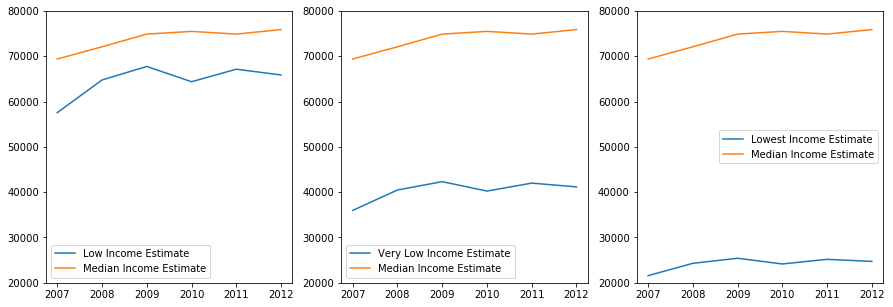

In [131]:
plt.figure(1,figsize=(15,5))

# compare "Low Income Estimate" bracket to "Median Family Income Estimate" bracket
plt.subplot(1,3,1)
plt.plot(df_low.T['Low Income'])
plt.plot(medianIncomeGraph.iloc[0])
plt.legend(['Low Income Estimate', 'Median Income Estimate'], loc='middle right')
plt.ylim([20000,80000])

# compare "Very Low Income Estimate" bracket to "Median Family Income Estimate" bracket
plt.subplot(1,3,2)
plt.plot(df_vlow.T['Very Low Income'])
plt.plot(medianIncomeGraph.iloc[0])
plt.legend(['Very Low Income Estimate', 'Median Income Estimate'], loc='middle right')
plt.ylim([20000,80000])

# compare "Lowest Income Estimate" bracket to "Median Family Income Estimate" bracket
plt.subplot(1,3,3)
plt.plot(df_lowest.T['Lowest Income'])
plt.plot(medianIncomeGraph.iloc[0])
plt.legend(['Lowest Income Estimate', 'Median Income Estimate'], loc='middle right')
plt.ylim([20000,80000])

In [132]:
# Merge all of the newly created data sets
df_all = df_low.merge(df_vlow, how='outer')
df_all = df_all.merge(df_lowest, how='outer')
df_all = df_all.merge(medianIncomeGraph, how='outer')
df_all = df_all.rename({0: 'Low Income', 1: 'Very Low Income', 
                        2: 'Lowest Income', 3: 'Median Income'})

In [133]:
df_all

,2007,2008,2009,2010,2011,2012
Low Income,57556.25,64775.0,67756.25,64387.50,67150.00,65875.0
Very Low Income,35975.00,40487.5,42325.00,40250.00,42006.25,41175.0
Lowest Income,21581.25,24300.0,25418.75,24156.25,25181.25,24725.0
Median Income,69400.00,72100.0,74900.00,75500.00,74900.00,75900.0


# 3. Simple Visualizations

(20000, 70000)

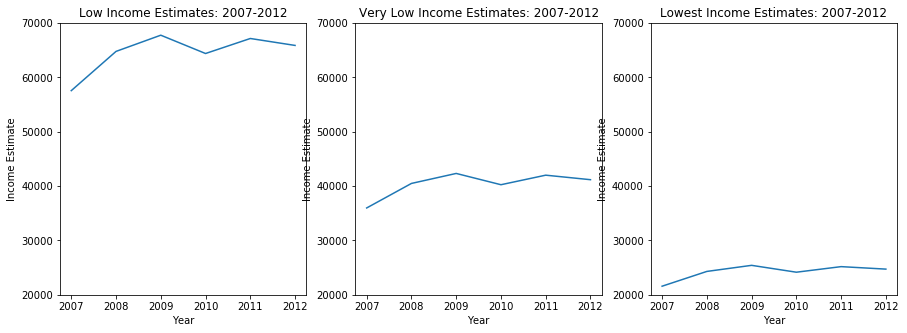

In [134]:
# Display visualization for "Low Income Estimate" Bracket across the years
df_income_all = df_all.copy(deep=True)
plt.figure(1,figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Low Income Estimates: 2007-2012')
plt.xlabel('Year')
plt.ylabel('Income Estimate')
plt.plot(df_income_all.T['Low Income'])
plt.ylim([20000,70000])


# Display visualization for "Very Low Income Estimate" Bracket across the years
plt.subplot(1,3,2)
plt.title('Very Low Income Estimates: 2007-2012')
plt.xlabel('Year')
plt.ylabel('Income Estimate')
plt.plot(df_income_all.T['Very Low Income'])
plt.ylim([20000,70000])


# Display visualization for "Lowest Income Estimate" Bracket across the years
plt.subplot(1,3,3)
plt.title('Lowest Income Estimates: 2007-2012')
plt.xlabel('Year')
plt.ylabel('Income Estimate')
plt.plot(df_income_all.T['Lowest Income'])
plt.ylim([20000,70000])

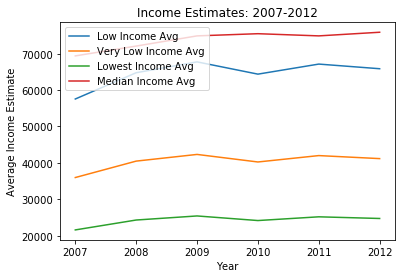

In [135]:
# Display visualization for all brackets across the years
df_income_all = df_all.copy(deep=True)
plt.title('Income Estimates: 2007-2012')
plt.xlabel('Year')
plt.ylabel('Average Income Estimate')
plt.plot(df_income_all.T['Low Income'])
plt.plot(df_income_all.T['Very Low Income'])
plt.plot(df_income_all.T['Lowest Income'])
plt.plot(df_income_all.T['Median Income'])
plt.legend(['Low Income Avg', 'Very Low Income Avg', 
            'Lowest Income Avg', 'Median Income Avg'], loc='upper left')


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  2.]),
 array([ 21581.25,  21965.  ,  22348.75,  22732.5 ,  23116.25,  23500.  ,
         23883.75,  24267.5 ,  24651.25,  25035.  ,  25418.75]),
 <a list of 10 Patch objects>)

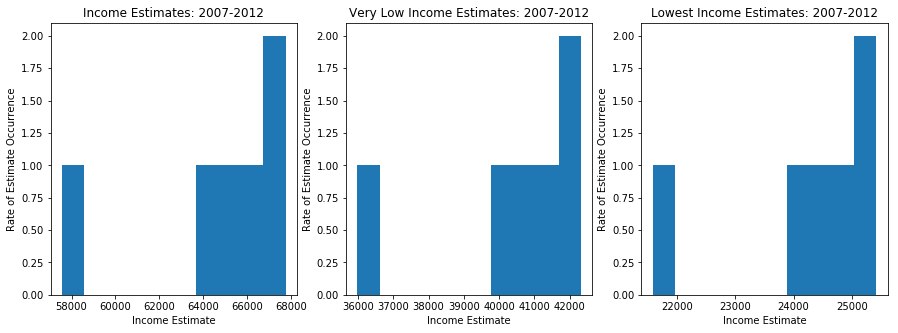

In [136]:
# Display visualization for "Low Income Estimate" Bracket across the years
df_income_all = df_all.copy(deep=True)
plt.figure(1,figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Income Estimates: 2007-2012')
plt.xlabel('Income Estimate')
plt.ylabel('Rate of Estimate Occurrence')
plt.hist(df_income_all.iloc[0])

# Display visualization for "Very Low Income Estimate" Bracket across the years
plt.subplot(1,3,2)
plt.title('Very Low Income Estimates: 2007-2012')
plt.xlabel('Income Estimate')
plt.ylabel('Rate of Estimate Occurrence')
plt.hist(df_income_all.T['Very Low Income'])

# Display visualization for "Lowest Income Estimate" Bracket across the years
plt.subplot(1,3,3)
plt.title('Lowest Income Estimates: 2007-2012')
plt.xlabel('Income Estimate')
plt.ylabel('Rate of Estimate Occurrence')
plt.hist(df_income_all.iloc[2])

(array([ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  2.]),
 array([ 69400.,  70050.,  70700.,  71350.,  72000.,  72650.,  73300.,
         73950.,  74600.,  75250.,  75900.]),
 <a list of 10 Patch objects>)

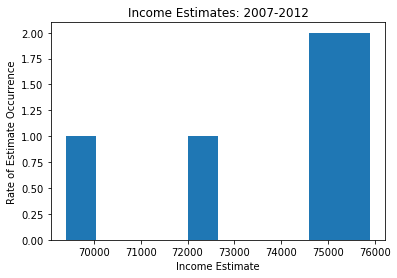

In [137]:
# Display visualization for "Median Family Income Estimate" Bracket across the years
plt.title('Income Estimates: 2007-2012')
plt.xlabel('Income Estimate')
plt.ylabel('Rate of Estimate Occurrence')
plt.hist(df_income_all.iloc[3])

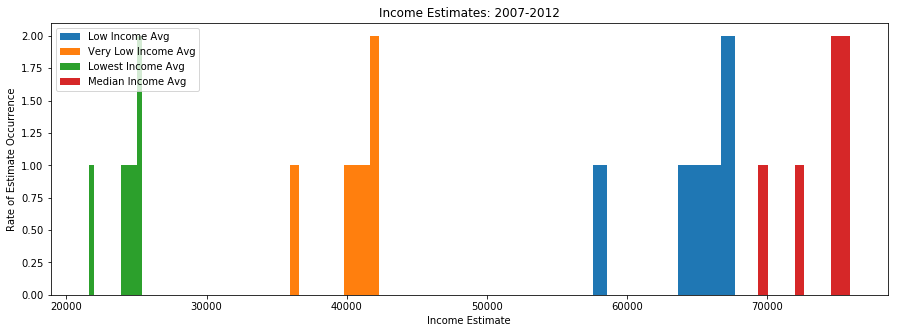

In [146]:
# Display visualization for all brackets across the years
fig = plt.figure(1,figsize=(15,5))
width = 0.12
ax = fig.add_subplot(111)

plt.title('Income Estimates: 2007-2012')
plt.xlabel('Income Estimate')
plt.ylabel('Rate of Estimate Occurrence')
plt.hist(df_income_all.T['Low Income'])
plt.hist(df_income_all.T['Very Low Income'])
plt.hist(df_income_all.T['Lowest Income'])
plt.hist(df_income_all.T['Median Income'])
plt.legend(['Low Income Avg', 'Very Low Income Avg', 
            'Lowest Income Avg', 'Median Income Avg'], loc='upper left')


In [139]:
df_all

,2007,2008,2009,2010,2011,2012
Low Income,57556.25,64775.0,67756.25,64387.50,67150.00,65875.0
Very Low Income,35975.00,40487.5,42325.00,40250.00,42006.25,41175.0
Lowest Income,21581.25,24300.0,25418.75,24156.25,25181.25,24725.0
Median Income,69400.00,72100.0,74900.00,75500.00,74900.00,75900.0


In [140]:
# method to help label values inside graph
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

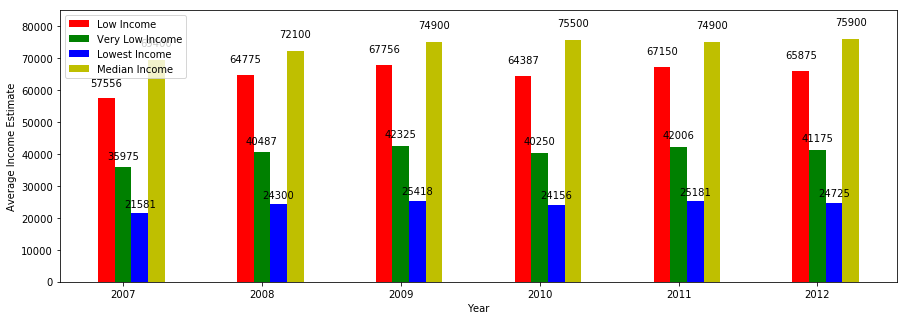

In [141]:
# Create multi bar graph to display information of all brackets
N = 6
fig = plt.figure(1,figsize=(15,5))
ind = np.arange(N)
width = 0.12
ax = fig.add_subplot(111)

# low income bracket
lowIncome = [df_all.T['Low Income'].iloc[0], df_all.T['Low Income'].iloc[1],
            df_all.T['Low Income'].iloc[2], df_all.T['Low Income'].iloc[3],
            df_all.T['Low Income'].iloc[4], df_all.T['Low Income'].iloc[5]]
lowIncomeRect = ax.bar(ind, lowIncome, width, color='r')

# very low income bracket
veryLowIncome = [df_all.T['Very Low Income'].iloc[0], df_all.T['Very Low Income'].iloc[1],
                df_all.T['Very Low Income'].iloc[2], df_all.T['Very Low Income'].iloc[3],
                df_all.T['Very Low Income'].iloc[4], df_all.T['Very Low Income'].iloc[5]]
veryLowIncomeRect = ax.bar(ind+width, veryLowIncome, width, color='g')

# lowest income bracket
lowestIncome = [df_all.T['Lowest Income'].iloc[0], df_all.T['Lowest Income'].iloc[1],
            df_all.T['Lowest Income'].iloc[2], df_all.T['Lowest Income'].iloc[3],
            df_all.T['Lowest Income'].iloc[4], df_all.T['Lowest Income'].iloc[5]]
lowestIncomeRect = ax.bar(ind+width*2, lowestIncome, width, color='b')

# median income bracket
medianIncome = [df_all.T['Median Income'].iloc[0], df_all.T['Median Income'].iloc[1],
                df_all.T['Median Income'].iloc[2], df_all.T['Median Income'].iloc[3],
                df_all.T['Median Income'].iloc[4], df_all.T['Median Income'].iloc[5]]
medianIncomeRect = ax.bar(ind+width*3, medianIncome, width, color='y')

ax.set_ylabel('Average Income Estimate')
ax.set_xlabel('Year')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2007', '2008', '2009', '2010', '2011', '2012') )
ax.legend( (lowIncomeRect[0], veryLowIncomeRect[0], lowestIncomeRect[0], medianIncomeRect[0]), 
          ('Low Income', 'Very Low Income', 'Lowest Income', 'Median Income') )
plt.ylim([0,85000])

# label values in bar graph
autolabel(lowIncomeRect)
autolabel(veryLowIncomeRect)
autolabel(lowestIncomeRect)
autolabel(medianIncomeRect)

plt.figure(1, figsize=(50,40))
plt.show()

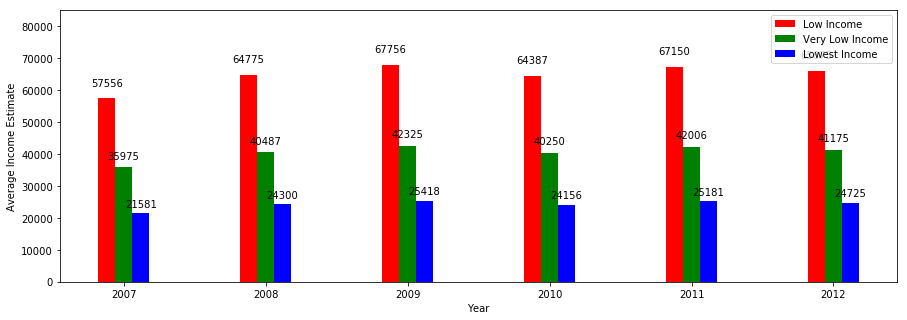

In [142]:
# Create multi bar graph to display information of all avg income brackets
N = 6
fig = plt.figure(1,figsize=(15,5))
ind = np.arange(N)
width = 0.12
ax = fig.add_subplot(111)

# low income bracket
lowIncome = [df_all.T['Low Income'].iloc[0], df_all.T['Low Income'].iloc[1],
            df_all.T['Low Income'].iloc[2], df_all.T['Low Income'].iloc[3],
            df_all.T['Low Income'].iloc[4], df_all.T['Low Income'].iloc[5]]
lowIncomeRect = ax.bar(ind, lowIncome, width, color='r')

# very low income bracket
veryLowIncome = [df_all.T['Very Low Income'].iloc[0], df_all.T['Very Low Income'].iloc[1],
                df_all.T['Very Low Income'].iloc[2], df_all.T['Very Low Income'].iloc[3],
                df_all.T['Very Low Income'].iloc[4], df_all.T['Very Low Income'].iloc[5]]
veryLowIncomeRect = ax.bar(ind+width, veryLowIncome, width, color='g')

# lowest income bracket
lowestIncome = [df_all.T['Lowest Income'].iloc[0], df_all.T['Lowest Income'].iloc[1],
            df_all.T['Lowest Income'].iloc[2], df_all.T['Lowest Income'].iloc[3],
            df_all.T['Lowest Income'].iloc[4], df_all.T['Lowest Income'].iloc[5]]
lowestIncomeRect = ax.bar(ind+width*2, lowestIncome, width, color='b')

ax.set_ylabel('Average Income Estimate')
ax.set_xlabel('Year')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2007', '2008', '2009', '2010', '2011', '2012') )
ax.legend( (lowIncomeRect[0], veryLowIncomeRect[0], lowestIncomeRect[0]), 
          ('Low Income', 'Very Low Income', 'Lowest Income') )
plt.ylim([0,85000])

# label values in bar graph
autolabel(lowIncomeRect)
autolabel(veryLowIncomeRect)
autolabel(lowestIncomeRect)

plt.figure(1, figsize=(50,40))
plt.show()

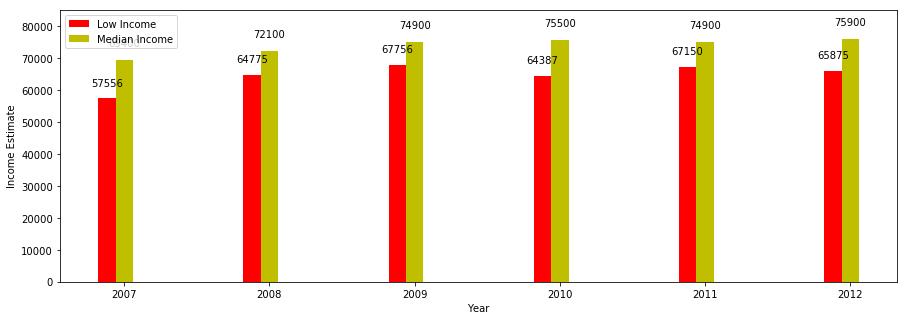

In [143]:
# Create multi bar graph to display information of low income and median brackets
N = 6
fig = plt.figure(1,figsize=(15,5))
ind = np.arange(N)
width = 0.12
ax = fig.add_subplot(111)

# low income bracket
lowIncome = [df_all.T['Low Income'].iloc[0], df_all.T['Low Income'].iloc[1],
            df_all.T['Low Income'].iloc[2], df_all.T['Low Income'].iloc[3],
            df_all.T['Low Income'].iloc[4], df_all.T['Low Income'].iloc[5]]
lowIncomeRect = ax.bar(ind, lowIncome, width, color='r')

# median income bracket
medianIncome = [df_all.T['Median Income'].iloc[0], df_all.T['Median Income'].iloc[1],
                df_all.T['Median Income'].iloc[2], df_all.T['Median Income'].iloc[3],
                df_all.T['Median Income'].iloc[4], df_all.T['Median Income'].iloc[5]]
medianIncomeRect = ax.bar(ind+width, medianIncome, width, color='y')

ax.set_ylabel('Income Estimate')
ax.set_xlabel('Year')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2007', '2008', '2009', '2010', '2011', '2012') )
ax.legend( (lowIncomeRect[0], medianIncomeRect[0]), 
          ('Low Income', 'Median Income') )
plt.ylim([0,85000])

# label values in bar graph
autolabel(lowIncomeRect)
autolabel(medianIncomeRect)

plt.figure(1, figsize=(50,40))
plt.show()

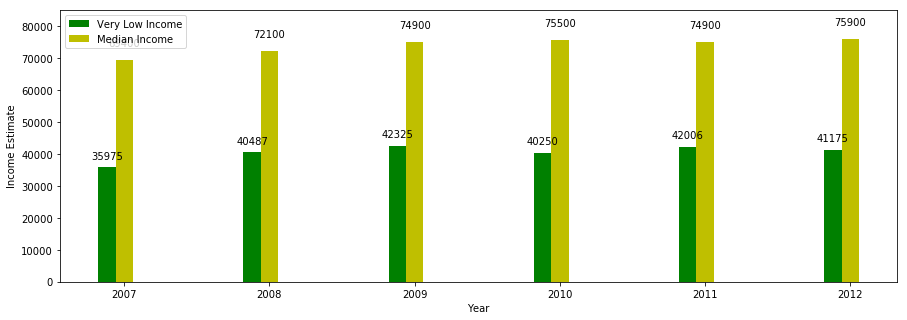

In [144]:
# Create multi bar graph to display information of very low income and median brackets
N = 6
fig = plt.figure(1,figsize=(15,5))
ind = np.arange(N)
width = 0.12
ax = fig.add_subplot(111)

# very low income bracket
veryLowIncome = [df_all.T['Very Low Income'].iloc[0], df_all.T['Very Low Income'].iloc[1],
                df_all.T['Very Low Income'].iloc[2], df_all.T['Very Low Income'].iloc[3],
                df_all.T['Very Low Income'].iloc[4], df_all.T['Very Low Income'].iloc[5]]
veryLowIncomeRect = ax.bar(ind, veryLowIncome, width, color='g')

# median income bracket
medianIncome = [df_all.T['Median Income'].iloc[0], df_all.T['Median Income'].iloc[1],
                df_all.T['Median Income'].iloc[2], df_all.T['Median Income'].iloc[3],
                df_all.T['Median Income'].iloc[4], df_all.T['Median Income'].iloc[5]]
medianIncomeRect = ax.bar(ind+width, medianIncome, width, color='y')

ax.set_ylabel('Income Estimate')
ax.set_xlabel('Year')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2007', '2008', '2009', '2010', '2011', '2012') )
ax.legend( (veryLowIncomeRect[0], medianIncomeRect[0]), 
          ('Very Low Income', 'Median Income') )
plt.ylim([0,85000])

# label values in bar graph
autolabel(veryLowIncomeRect)
autolabel(medianIncomeRect)

plt.figure(1, figsize=(50,40))
plt.show()

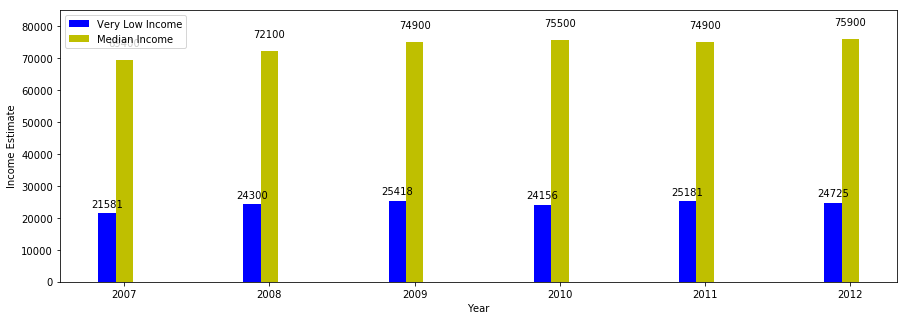

In [145]:
# Create multi bar graph to display information of lowest income and median brackets
N = 6
fig = plt.figure(1,figsize=(15,5))
ind = np.arange(N)
width = 0.12
ax = fig.add_subplot(111)

# lowest income bracket
lowestIncome = [df_all.T['Lowest Income'].iloc[0], df_all.T['Lowest Income'].iloc[1],
            df_all.T['Lowest Income'].iloc[2], df_all.T['Lowest Income'].iloc[3],
            df_all.T['Lowest Income'].iloc[4], df_all.T['Lowest Income'].iloc[5]]
lowestIncomeRect = ax.bar(ind, lowestIncome, width, color='b')

# median income bracket
medianIncome = [df_all.T['Median Income'].iloc[0], df_all.T['Median Income'].iloc[1],
                df_all.T['Median Income'].iloc[2], df_all.T['Median Income'].iloc[3],
                df_all.T['Median Income'].iloc[4], df_all.T['Median Income'].iloc[5]]
medianIncomeRect = ax.bar(ind+width, medianIncome, width, color='y')

ax.set_ylabel('Income Estimate')
ax.set_xlabel('Year')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2007', '2008', '2009', '2010', '2011', '2012') )
ax.legend( (lowestIncomeRect[0], medianIncomeRect[0]), 
          ('Very Low Income', 'Median Income') )
plt.ylim([0,85000])

# label values in bar graph
autolabel(lowestIncomeRect)
autolabel(medianIncomeRect)

plt.figure(1, figsize=(50,40))
plt.show()